In [1]:
import torch

from torch.utils.data import DataLoader
from torchmetrics import JaccardIndex, Dice
import matplotlib.pyplot as plt

from MyUnetModel import MyUnetModel
from utils import get_images_from_path


In [2]:
device = (torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'))

In [3]:
test_dataset = get_images_from_path("../nn3_data/PH2 Dataset images/test", device=device)
dataloader = DataLoader(test_dataset)

In [4]:
model = MyUnetModel()
model.load_state_dict(torch.load("my_unet_model2.pt"))

<All keys matched successfully>

In [5]:
image = torch.ones((1, 3, 512, 512))
model(image).shape

torch.Size([1, 2, 512, 512])

torch.Size([256, 256])


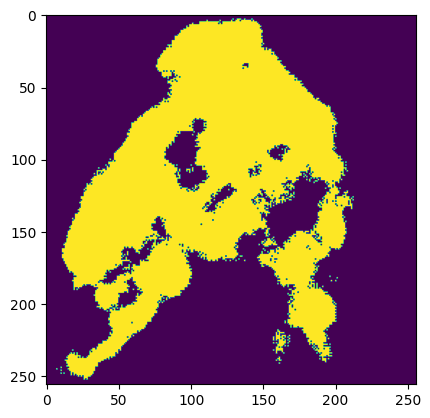

In [11]:
example = test_dataset[1][1]
predicted = model(test_dataset[1][0].unsqueeze(0)).argmax(1).squeeze()
print(predicted.shape)
plt.imshow(predicted)

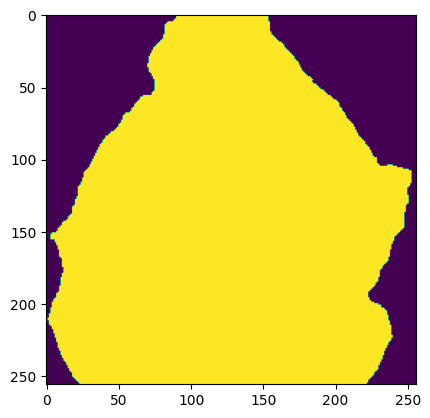

In [12]:
plt.imshow(example)

In [8]:
(example == 1).sum()

tensor(10760)

In [19]:
def get_iou(predicted: torch.Tensor, real: torch.Tensor):
    p = (predicted == 1)
    r = (real == 1)
    intersection = p & r
    union = p | r
    
    return (intersection.sum() /  union.sum())

def get_dice(predicted: torch.Tensor, real: torch.Tensor):
    p = (predicted == 1)
    r = (real == 1)
    intersection = p & r
    return ((2 * intersection.sum())/((p.sum() + r.sum())))

In [13]:
iou_s = []
for image, mask in dataloader:
    iou = get_iou(model(image).argmax(1), mask)
    iou_s.append(iou)
print(torch.Tensor(iou_s).mean())

tensor(0.6089)


In [20]:
dices = []
for image, mask in dataloader:
    dice = get_dice(model(image).argmax(1), mask)
    dices.append(dice)
    print(dice)
print("______")
print(torch.Tensor(dices).mean())

tensor(0.9033)
tensor(0.6703)
tensor(0.8276)
tensor(0.8245)
tensor(0.8010)
tensor(0.8404)
tensor(0.6011)
tensor(0.7851)
tensor(0.7043)
tensor(0.5585)
tensor(0.6083)
tensor(0.4519)
tensor(0.7797)
tensor(0.6524)
tensor(0.6672)
tensor(0.5874)
tensor(0.8208)
tensor(0.5160)
tensor(0.5434)
tensor(0.6639)
tensor(0.9416)
tensor(0.8523)
tensor(0.9339)
tensor(0.8520)
tensor(0.8932)
tensor(0.7535)
tensor(0.8615)
tensor(0.6313)
tensor(0.8358)
tensor(0.9201)
______
tensor(0.7427)
